Project is created using the data from Kaggle ([link here](https://www.kaggle.com/mchirico/montcoalert))

In [209]:
# importing numpy and pandas libraries
import numpy as np
import pandas as pd

In [210]:
# Importing visualization libraries and setting %matplotlib inline for the plot display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [211]:
# Reading in the data
df=pd.read_csv(r'C:\Users\Anubhav\Desktop\911.csv')

In [212]:
# Looking at the data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [213]:
# Checking the number of rows, number of columns and datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [214]:
# Checking the top 5 zipcodes for 911 calls
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [215]:
# Checking the top 5 townships (twp) for 911 calls
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [216]:
# Checking the uniwue title codes from the title column
df['title'].nunique()

148

In [217]:
# Using the title column to create a new column called "Reason" that contains the string value (EMS, Fire and Traffic)
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [218]:
# Checking the most common Reason for a 911 call
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

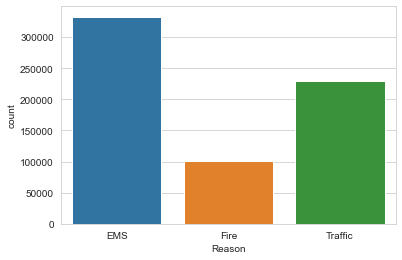

In [219]:
# Countplot of 911 calls by Reason using seaborn
sns.countplot(x='Reason', data=df)

In [220]:
# Checking the data type of the objects in the timeStamp column
type(df['timeStamp'][0])

str

In [221]:
# Converting the timeStamp column from strings to DateTime objects
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [222]:
# Using .apply() to create 3 new columns called Hour, Month, and Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,2015,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,2015,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,2015,3


In [223]:
# Checking the number of calls based on year
df['Year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
2020     72258
2015      7916
Name: Year, dtype: int64

In [224]:
# Checking how many months of data is present from the year 2015
df[df['Year']==2015]['Month'].nunique()

1

In [225]:
# Checking how many months of data is present from the year 2020
df[df['Year']==2020]['Month'].nunique()

7

In [226]:
# Removing 2015 data and 2020 data as the data is not enough and the charts obtained using this data will be flawed
df=df.loc[df['Year']!=2015]
df=df.loc[df['Year']!=2020]

In [227]:
# Checking the number of calls based on year
df['Year'].value_counts()

2018    151527
2019    149118
2016    142360
2017    140343
Name: Year, dtype: int64

In [228]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Year,Day of Week
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,2016,4
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,2016,4
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,2016,4
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,2016,4
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,2016,4


In [229]:
# Mapping names to the Day of Week which is an integer 0-6
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Year,Day of Week
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,EMS,0,1,2016,Fri
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,EMS,0,1,2016,Fri
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,EMS,0,1,2016,Fri
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,EMS,0,1,2016,Fri
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,EMS,0,1,2016,Fri


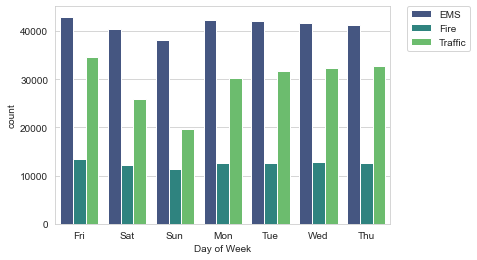

In [230]:
# Countplot of 911 calls by Day of Week column based on the Reason column
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

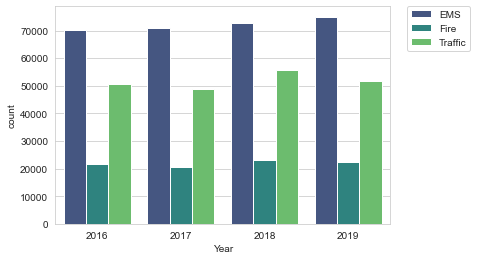

In [231]:
# Countplot of 911 calls by Year column based
sns.countplot(x='Year', data=df,hue='Reason' ,palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

<AxesSubplot:xlabel='Month'>

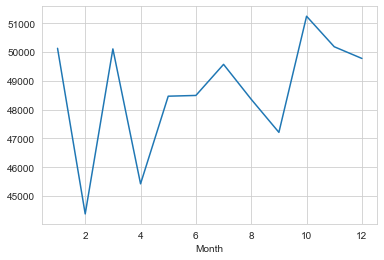

In [232]:
# Simple plot of the count of calls per month
df.groupby('Month').count()['lat'].plot()

Text(0.5, 1.0, 'Traffic')

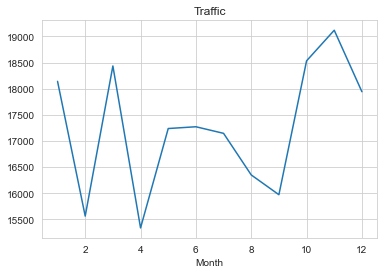

In [233]:
# Simple plot of the count of calls per month based on the Reason 'Traffic'
df[df['Reason']=='Traffic'].groupby('Month').count()['lat'].plot()
plt.title('Traffic')

Text(0.5, 1.0, 'Fire')

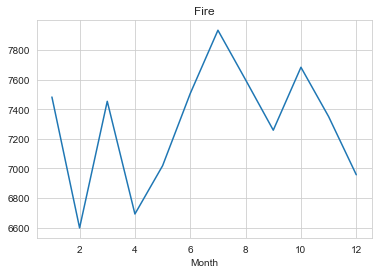

In [234]:
# Simple plot of the count of calls per month based off the Reason 'Fire'
df[df['Reason']=='Fire'].groupby('Month').count()['lat'].plot()
plt.title('Fire')

Text(0.5, 1.0, 'EMS')

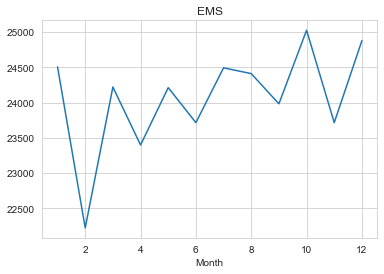

In [235]:
# Simple plot of the count of calls per month based off the Reason 'EMS'
df[df['Reason']=='EMS'].groupby('Month').count()['lat'].plot()
plt.title('EMS')

In [236]:
# Creating a new dataframe grouped by Month
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Year,Day of Week
Month,,,,,,,,,,,,,
1,50128,50128,50128,44378,50128,50128,50110,50128,50128,50128,50128,50128,50128
2,44384,44384,44384,39100,44384,44384,44369,44384,44384,44384,44384,44384,44384
3,50107,50107,50107,44344,50107,50107,50087,50107,50107,50107,50107,50107,50107
4,45428,45428,45428,39810,45428,45428,45414,45428,45428,45428,45428,45428,45428
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467,48467


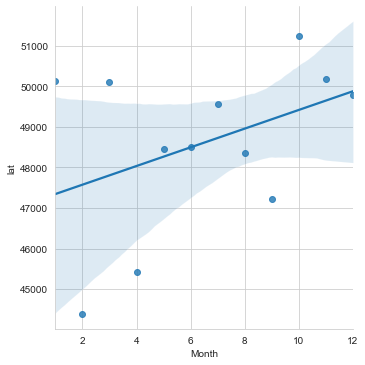

In [237]:
# Linear fit on the number of calls per month
sns.lmplot(x='Month', y='lat', data=byMonth.reset_index())

In [238]:
# Using the dataframe df to create a pivot table wherein columns becomes the Hours and the Index becomes the Day of the Week
day_hour=df.pivot_table( values="Reason" , index = "Day of Week" , columns = "Hour" , aggfunc="count")
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1759,1435,1285,1169,1133,1451,2360,3714,4423,4652,...,5616,6217,6274,6274,5014,4454,3845,3432,2991,2532
Mon,1658,1372,1194,1118,1176,1597,2375,3947,4979,5092,...,4964,5438,5613,5677,4794,3931,3318,2849,2308,1818
Sat,2157,1822,1680,1371,1264,1377,1679,2225,3064,3844,...,4793,4512,4548,4557,4354,4161,3686,3394,2857,2626
Sun,2123,1871,1705,1418,1316,1277,1514,2072,2623,3295,...,4137,3919,3977,3957,3814,3676,3293,2789,2280,2045
Thu,1487,1211,1227,1069,1082,1560,2517,4023,4740,4798,...,5290,5674,5589,6151,4858,4102,3553,3066,2485,2053
Tue,1524,1254,1178,1069,1084,1537,2469,3959,5047,4982,...,5215,5573,5784,6114,5000,4030,3392,2947,2349,1844
Wed,1439,1288,1093,1104,960,1391,2366,4231,4915,4829,...,5284,5755,5969,6229,4977,4100,3617,3052,2449,1925


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

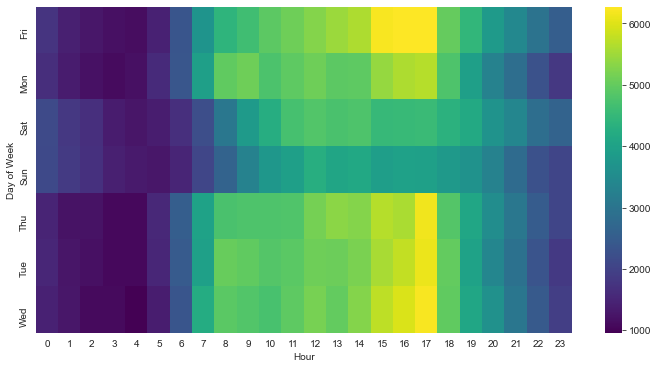

In [239]:
# Creating a heatmap using the dataframe day_hour
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis')

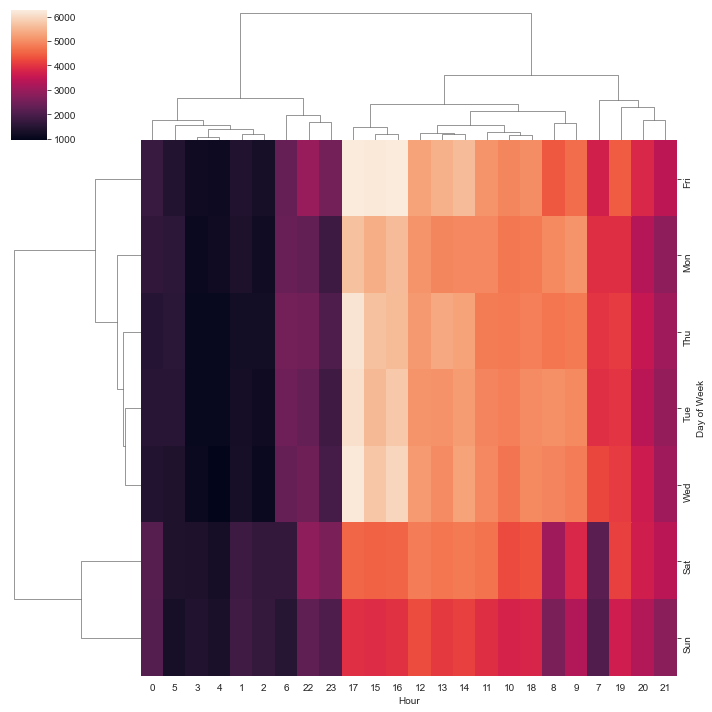

In [240]:
# Creating a clustermap using the dataframe day_hour
sns.clustermap(day_hour)

In [241]:
# Using the dataframe df to create a pivot table wherein columns becomes the Months and the Index becomes the Day of the Week
day_month=df.pivot_table( values="Reason" , index = "Day of Week" , columns = "Month" , aggfunc="count")
day_month.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,7281,6552,9515,6922,7214,7647,7103,7336,7694,6934,8379,8247
Mon,7417,7143,6341,7170,6746,6740,7929,6854,6598,8075,6722,7241
Sat,6544,5870,6868,6530,5796,6839,6395,6111,6566,6609,6773,7632
Sun,6136,5119,5375,5911,5410,5673,6567,5275,5956,6316,5196,6261
Thu,7057,6348,7570,6147,7524,7850,6964,7508,6954,7482,8358,6889


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

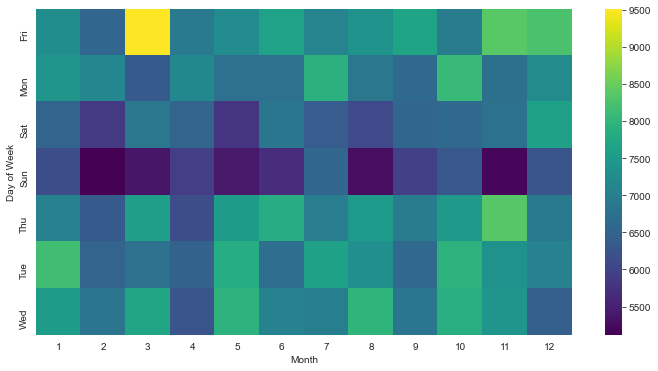

In [242]:
# Creating a heatmap using the dataframe day_month
plt.figure(figsize=(12,6))
sns.heatmap(day_month,cmap='viridis')

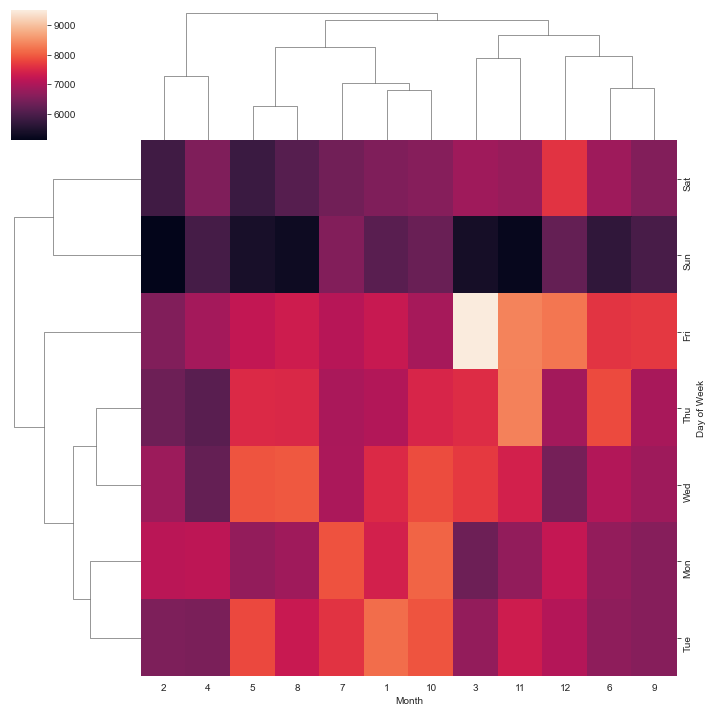

In [243]:
# Creating a clustermap using the dataframe day_month
fig=sns.clustermap(day_month)